In [3]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unrar x "/content/drive/MyDrive/Crypro_21.rar" "content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Crypro_21.rar

Creating    content                                                   OK
Extracting  content/data_TSTUSDT.pkl                                       4%  OK 
Extracting  content/data_TRXUSDT.pkl                                       9%  OK 
Extracting  content/data_OGUSDT.pkl                                       13%  OK 
Extracting  content/data_XRPUSDT.pkl                                      19%  OK 
Extracting  content/data_FORMUSDT.pkl                                     23%  OK 
Extracting  content/data_USDCUSDT.pkl                                     27%  OK 
Extracting  content/data_BTCUSDT.pkl                                      34% 35%  OK 
Extracting  content/data_WUSDT.pkl                                        39%  OK 
Extracting  content/data_TUSDT.pkl                   

In [5]:
import pandas as pd
symbol = 'BTCUSDT'
df_news = pd.read_pickle('/content/drive/MyDrive/news_20crypto.pickle')
df_news['time'] = pd.to_datetime(df_news['releasedAt']).dt.floor('min').astype(str)
df_news = df_news[df_news['asset_symbols'].apply(lambda x: (symbol[:-4] in str(x)) or ('ETH' in str(x)))]
df_news[['releasedAt', 'time']]
df_news

,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,time
1,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,2025-02-25 00:00:00
5,67bf0e677abefca47e663282,2025-02-25 00:00:00,Bitcoin Dives Below $90K Amid ETF Sell-Offs an...,"Bitcoin has dropped below $90,000 for the firs...",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-dives-below-90k-amid-etf-sell-offs-and...,"Solana, ETF, Bitcoin, ETF, Shiba Inu","solana, etf, bitcoin, etfsol2024, shiba-inu","SOL, ETF, BTC, ETF, SHIB","Bitcoin has dropped below $90,000 for the firs...",2025-02-25 00:00:00
7,67bf0e677abefca47e663284,2025-02-25 00:00:00,4 Ways to Increase the Value of Crypto Assets,Cryptocurrency investments can be highly rewar...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,4-ways-to-increase-the-value-of-crypto-assets,"Bounty, Cryptocurrency, Million, Liquid, Rewards","bounty, cryptocurrency, million, liquid-networ...","BNTY, CCY, MM, LBTC, RWD",Cryptocurrency investments can be highly rewar...,2025-02-25 00:00:00
10,67bf0e677abefca47e66327c,2025-02-25 00:00:10,"Major Crypto News: XRP, SOLANA, and MAGACOINOF...",The Crypto Market’s Next Big Movers—Who’s Lead...,Bitcoin Sistemi,https://coinmarketcap.com/community/en/article...,coinmarketcap,major-crypto-news-xrp-solana-and-magacoinoffic...,"Ethereum, Win, Major, Solana, XRP","ethereum, connect-united, major, solana, xrp","ETH, WIN, MAJOR, SOL, XRP",The Crypto Market’s Next Big Movers—Who’s Lead...,2025-02-25 00:00:00
14,67bf0e677abefca47e663278,2025-02-25 00:01:00,"XRP on Verge of Losing Crucial Support, Ethere...",Numerous assets are reaching levels that might...,U.Today,https://coinmarketcap.com/community/en/article...,coinmarketcap,xrp-on-verge-of-losing-crucial-support-ethereu...,"Ethereum, Dogecoin, bullish, Dogecoin, XRP","ethereum, doge-on-base, bullish, dogecoin, xrp","ETH, DOGE, BULLISH, DOGE, XRP",Cover image viaU.TodayWith its price hovering ...,2025-02-25 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68193,6833ac73040d6fffd0a49f14,2025-05-25 23:40:38,Metaplanet Tops SBI Securities NISA Stock Purc...,Metaplanet leads as top stock purchase in Japa...,CoinLineup,https://coinmarketcap.com/community/en/article...,coinmarketcap,metaplanet-sbi-securities-nisa-stock,"Bitcoin, Top, Read, CEO","bitcoin, top-protocol, read, ceo","BTC, TOP, READ, CEO","Key Points:Metaplanet leads NISA purchases, si...",2025-05-25 23:40:00
68201,6833addc51e12bb49bc9cc37,2025-05-25 23:47:19,Bitcoin Halving Post-2024 Sparks Consolidation...,The 2024 Bitcoin halving event triggers signif...,TokenTopNews,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-halving-2024-market-analysis,"2024, 2024, Bitcoin, Read","2024-token, 2024-bsc, bitcoin, read","2024, 2024, BTC, READ",Key Takeaways:Bitcoin post-halving consolidati...,2025-05-25 23:47:00
68205,6833af44d4ba08aec29a16cf,2025-05-25 23:52:53,Spot Bitcoin ETFs Achieve $25 Billion Weekly V...,U.S. spot Bitcoin ETFs reach $25 billion in we...,Bitcoin Info News,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-etfs-25-billion-volume,"Bitcoin ETF, Bitcoin, Read, Spot, BlackRock","bitcoin-etf-token, bitcoin, read, spot, blackrock","ETF, BTC, READ, SPOT, BLACKROCK",What to Know:Record trading volume in U.S. Bit...,2025-05-25 23:52:00
68209,6833af44d4ba08aec29a16cd,2025-05-25 23:55:31,"Trump Postpones EU Tariffs, Bitcoin Breaks $10...",Trump delays EU tariffs to July; Bitcoin rises...,Coincu,https://coinmarketcap.com/community/en/artic

In [6]:
data_btc_total = pd.read_pickle('/content/content/data_{}.pkl'.format(symbol))
data_btc_total['time'] = data_btc_total['dateTime'].astype(str)

Add Indicator

In [7]:
merged_data = data_btc_total.copy()

merged_data['Volatility'] = merged_data['close'].pct_change(fill_method=None).rolling(5).std().fillna(0)

# Calculate Moving Averages
merged_data['SMA_5'] = merged_data['close'].rolling(window=5).mean()
merged_data['EMA_5'] = merged_data['close'].ewm(span=5, adjust=False).mean()
merged_data['SMA_10'] = merged_data['close'].rolling(window=10).mean()
merged_data['EMA_10'] = merged_data['close'].ewm(span=10, adjust=False).mean()
merged_data['SMA_20'] = merged_data['close'].rolling(window=20).mean()
merged_data['EMA_20'] = merged_data['close'].ewm(span=20, adjust=False).mean()
merged_data['EMA_50'] = merged_data['close'].ewm(span=50, adjust=False).mean()
merged_data['SMA_100'] = merged_data['close'].rolling(window=100).mean()
merged_data['EMA_100'] = merged_data['close'].ewm(span=100, adjust=False).mean()
merged_data['EMA_200'] = merged_data['close'].ewm(span=200, adjust=False).mean()

# Calculate Bollinger Bands
merged_data['Std_20'] = merged_data['close'].rolling(window=20).std()
merged_data['Upper_BB'] = merged_data['SMA_20'] + (2 * merged_data['Std_20'])
merged_data['Lower_BB'] = merged_data['SMA_20'] - (2 * merged_data['Std_20'])

# Add a Signal column (e.g., 1 if Close > SMA_20, else 0)
# Calculate MACD and Signal Line
# MACD Line = 12-period EMA - 26-period EMA
merged_data['EMA_12'] = merged_data['close'].ewm(span=12, adjust=False).mean()
merged_data['EMA_26'] = merged_data['close'].ewm(span=26, adjust=False).mean()
merged_data['MACD'] = merged_data['EMA_12'] - merged_data['EMA_26']

# Signal Line = 9-period EMA of MACD Line
merged_data['Signal'] = merged_data['MACD'].ewm(span=9, adjust=False).mean()


Create Target

0.47945299562732274
0.5205470043726772


<Axes: >

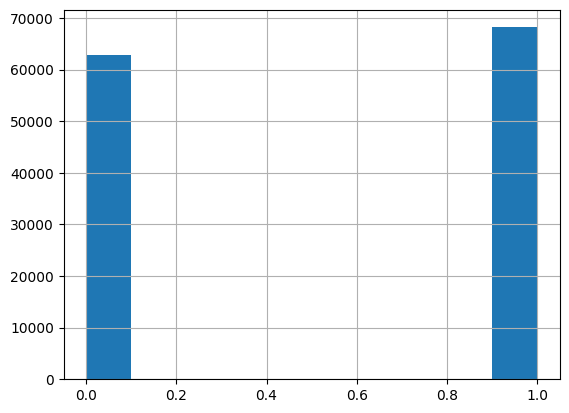

In [8]:
merged_data['prev_Returns'] = 100*((merged_data['close']-merged_data['close'].shift(1))/merged_data['close'])
merged_data['return'] = 100*merged_data['close'].pct_change()
merged_data['volatility'] = 10*merged_data['return'].rolling(30).std().shift(-30)

# merged_data['volatility'] = 100*((merged_data['close'].shift(-30)-merged_data['close'])/merged_data['close'])

threshold = 0.47
merged_data['return_class'] = 0
# merged_data.loc[abs(merged_data['volatility'])>threshold, 'return_class'] = 1
merged_data.loc[(merged_data['volatility'])>threshold, 'return_class'] = 1

# df.loc[df['return']<-threshold, 'return_class'] = 2

print((merged_data['return_class']==0).sum()/len(merged_data))
print((merged_data['return_class']==1).sum()/len(merged_data))
# print((df['return_class']==2).sum()/len(df))

merged_data['return_class'].hist()

Normalizing data and define input features

In [9]:
selected_f = ['open', 'high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol',
       'takerBuyQuoteVol', 'Volatility',
       'SMA_5', 'EMA_5', 'SMA_10', 'EMA_10', 'SMA_20', 'EMA_20', 'EMA_50',
       'SMA_100', 'EMA_100', 'EMA_200', 'Std_20', 'Upper_BB', 'Lower_BB',
       'prev_Returns', 'EMA_12', 'EMA_26', 'MACD', 'Signal']

for x in selected_f:
  merged_data[x] = merged_data[x].fillna(0)
  merged_data[x] = merged_data[x].astype(float)
  merged_data[x] = (merged_data[x]-merged_data[x].mean())/(merged_data[x].std())

Choose some timestamps with no news

In [10]:
merged_data = merged_data.dropna().reset_index().drop('index',axis=1)
data_stock = merged_data.copy()

selected_time = data_stock[(data_stock['time']>='2025-02-25 00:00:00') & (data_stock['dateTime']<'2025-05-25 01:44:00') & (~data_stock['time'].isin(df_news['time']))]['time'].sample(3000, random_state=42).to_list()

Adding No News rows to the main dataframe

In [11]:
df_news2 = df_news.copy()
df_news2['releasedAt'] = df_news2['releasedAt'].astype(str)
based_len = df_news2.index[-1]
list_data = []
for i in range(len(selected_time)):
  dict_data = {}
  dict_data['id'] = based_len+1+i
  dict_data['title'] = 'There is no news'
  dict_data['content'] = 'There is no news'
  dict_data['time'] = selected_time[i]
  dict_data['releasedAt'] = selected_time[i]
  list_data.append(dict_data)
df_news2 = pd.concat([df_news2, pd.DataFrame(list_data)])
df_news2 = df_news2.sort_values('time').reset_index().drop('index', axis=1)
df_news2


,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,time,id
0,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,2025-02-25 00:00:00,NaN
1,67bf0e677abefca47e663282,2025-02-25 00:00:00,Bitcoin Dives Below $90K Amid ETF Sell-Offs an...,"Bitcoin has dropped below $90,000 for the firs...",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-dives-below-90k-amid-etf-sell-offs-and...,"Solana, ETF, Bitcoin, ETF, Shiba Inu","solana, etf, bitcoin, etfsol2024, shiba-inu","SOL, ETF, BTC, ETF, SHIB","Bitcoin has dropped below $90,000 for the firs...",2025-02-25 00:00:00,NaN
2,67bf0e677abefca47e663284,2025-02-25 00:00:00,4 Ways to Increase the Value of Crypto Assets,Cryptocurrency investments can be highly rewar...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,4-ways-to-increase-the-value-of-crypto-assets,"Bounty, Cryptocurrency, Million, Liquid, Rewards","bounty, cryptocurrency, million, liquid-networ...","BNTY, CCY, MM, LBTC, RWD",Cryptocurrency investments can be highly rewar...,2025-02-25 00:00:00,NaN
3,67bf0e677abefca47e66327c,2025-02-25 00:00:10,"Major Crypto News: XRP, SOLANA, and MAGACOINOF...",The Crypto Market’s Next Big Movers—Who’s Lead...,Bitcoin Sistemi,https://coinmarketcap.com/community/en/article...,coinmarketcap,major-crypto-news-xrp-solana-and-magacoinoffic...,"Ethereum, Win, Major, Solana, XRP","ethereum, connect-united, major, solana, xrp","ETH, WIN, MAJOR, SOL, XRP",The Crypto Market’s Next Big Movers—Who’s Lead...,2025-02-25 00:00:00,NaN
4,67bf0e677abefca47e663278,2025-02-25 00:01:00,"XRP on Verge of Losing Crucial Support, Ethere...",Numerous assets are reaching levels that might...,U.Today,https://coinmarketcap.com/community/en/article...,coinmarketcap,xrp-on-verge-of-losing-crucial-support-ethereu...,"Ethereum, Dogecoin, bullish, Dogecoin, XRP","ethereum, doge-on-base, bullish, dogecoin, xrp","ETH, DOGE, BULLISH, DOGE, XRP",Cover image viaU.TodayWith its price hovering ...,2025-02-25 00:01:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38974,6833ac73040d6fffd0a49f14,2025-05-25 23:40:38,Metaplanet Tops SBI Securities NISA Stock Purc...,Metaplanet leads as top stock purchase in Japa...,CoinLineup,https://coinmarketcap.com/community/en/article...,coinmarketcap,metaplanet-sbi-securities-nisa-stock,"Bitcoin, Top, Read, CEO","bitcoin, top-protocol, read, ceo","BTC, TOP, READ, CEO","Key Points:Metaplanet leads NISA purchases, si...",2025-05-25 23:40:00,NaN
38975,6833addc51e12bb49bc9cc37,2025-05-25 23:47:19,Bitcoin Halving Post-2024 Sparks Consolidation...,The 2024 Bitcoin halving event triggers signif...,TokenTopNews,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-halving-2024-market-analysis,"2024, 2024, Bitcoin, Read","2024-token, 2024-bsc, bitcoin, read","2024, 2024, BTC, READ",Key Takeaways:Bitcoin post-halving consolidati...,2025-05-25 23:47:00,NaN
38976,6833af44d4ba08aec29a16cf,2025-05-25 23:52:53,Spot Bitcoin ETFs Achieve $25 Billion Weekly V...,U.S. spot Bitcoin ETFs reach $25 billion in we...,Bitcoin Info News,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-etfs-25-billion-volume,"Bitcoin ETF, Bitcoin, Read, Spot, BlackRock","bitcoin-etf-token, bitcoin, read, spot, blackrock","ETF, BTC, READ, SPOT, BLACKROCK",What to Know:Record trading volume in U.S. Bit...,2025-05-25 23:52:00,NaN
38977,6833af44d4ba08aec29a16cd,2025-05-25 23:55:31,"Trump Postpones EU Tariffs, Bitcoin Breaks $10...",Trump delays EU tariffs to July; Bitcoin rises...,Coincu,https:/

Adding OHLCVs index to the News dataframe for synchronization

In [12]:
# data_stock = data_btc_total.copy()
data_stock['my_id'] = data_stock.index
df_news2 = df_news2.merge(data_stock[['my_id', 'time', 'return_class']], on='time', how='left')
df_news2

,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,time,id,my_id,return_class
0,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,2025-02-25 00:00:00,NaN,NaN,NaN
1,67bf0e677abefca47e663282,2025-02-25 00:00:00,Bitcoin Dives Below $90K Amid ETF Sell-Offs an...,"Bitcoin has dropped below $90,000 for the firs...",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-dives-below-90k-amid-etf-sell-offs-and...,"Solana, ETF, Bitcoin, ETF, Shiba Inu","solana, etf, bitcoin, etfsol2024, shiba-inu","SOL, ETF, BTC, ETF, SHIB","Bitcoin has dropped below $90,000 for the firs...",2025-02-25 00:00:00,NaN,NaN,NaN
2,67bf0e677abefca47e663284,2025-02-25 00:00:00,4 Ways to Increase the Value of Crypto Assets,Cryptocurrency investments can be highly rewar...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,4-ways-to-increase-the-value-of-crypto-assets,"Bounty, Cryptocurrency, Million, Liquid, Rewards","bounty, cryptocurrency, million, liquid-networ...","BNTY, CCY, MM, LBTC, RWD",Cryptocurrency investments can be highly rewar...,2025-02-25 00:00:00,NaN,NaN,NaN
3,67bf0e677abefca47e66327c,2025-02-25 00:00:10,"Major Crypto News: XRP, SOLANA, and MAGACOINOF...",The Crypto Market’s Next Big Movers—Who’s Lead...,Bitcoin Sistemi,https://coinmarketcap.com/community/en/article...,coinmarketcap,major-crypto-news-xrp-solana-and-magacoinoffic...,"Ethereum, Win, Major, Solana, XRP","ethereum, connect-united, major, solana, xrp","ETH, WIN, MAJOR, SOL, XRP",The Crypto Market’s Next Big Movers—Who’s Lead...,2025-02-25 00:00:00,NaN,NaN,NaN
4,67bf0e677abefca47e663278,2025-02-25 00:01:00,"XRP on Verge of Losing Crucial Support, Ethere...",Numerous assets are reaching levels that might...,U.Today,https://coinmarketcap.com/community/en/article...,coinmarketcap,xrp-on-verge-of-losing-crucial-support-ethereu...,"Ethereum, Dogecoin, bullish, Dogecoin, XRP","ethereum, doge-on-base, bullish, dogecoin, xrp","ETH, DOGE, BULLISH, DOGE, XRP",Cover image viaU.TodayWith its price hovering ...,2025-02-25 00:01:00,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38974,6833ac73040d6fffd0a49f14,2025-05-25 23:40:38,Metaplanet Tops SBI Securities NISA Stock Purc...,Metaplanet leads as top stock purchase in Japa...,CoinLineup,https://coinmarketcap.com/community/en/article...,coinmarketcap,metaplanet-sbi-securities-nisa-stock,"Bitcoin, Top, Read, CEO","bitcoin, top-protocol, read, ceo","BTC, TOP, READ, CEO","Key Points:Metaplanet leads NISA purchases, si...",2025-05-25 23:40:00,NaN,129579.0,1.0
38975,6833addc51e12bb49bc9cc37,2025-05-25 23:47:19,Bitcoin Halving Post-2024 Sparks Consolidation...,The 2024 Bitcoin halving event triggers signif...,TokenTopNews,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-halving-2024-market-analysis,"2024, 2024, Bitcoin, Read","2024-token, 2024-bsc, bitcoin, read","2024, 2024, BTC, READ",Key Takeaways:Bitcoin post-halving consolidati...,2025-05-25 23:47:00,NaN,129586.0,0.0
38976,6833af44d4ba08aec29a16cf,2025-05-25 23:52:53,Spot Bitcoin ETFs Achieve $25 Billion Weekly V...,U.S. spot Bitcoin ETFs reach $25 billion in we...,Bitcoin Info News,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-etfs-25-billion-volume,"Bitcoin ETF, Bitcoin, Read, Spot, BlackRock","bitcoin-etf-token, bitcoin, read, spot, blackrock","ETF, BTC, READ, SPOT, BLACKROCK",What to Know:Record trading volume in U.S. Bit...,2025-05-25 23:52:00,NaN,129591.0,0.0
38977,6833af44d4ba08aec29a16cd,2025-05-25 23:55:31,"Trump Pos

<Axes: >

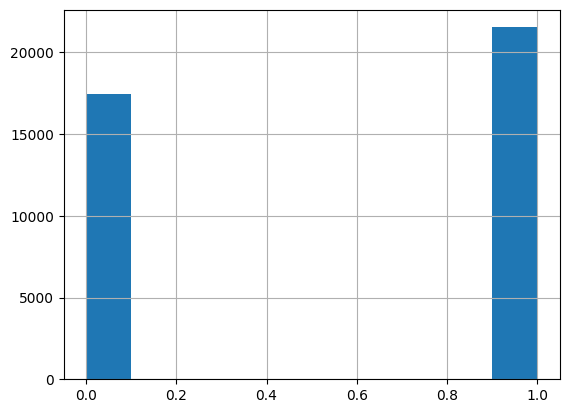

In [13]:
df_news2 = df_news2[~df_news2['my_id'].isna()].copy()
df_news2['return_class'].hist()

Create Dataclass and dataloader

In [14]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset


class NewsMarketFusionDataset(Dataset):
    def __init__(self, df_text, list_ohlcv, list_time, features=None, tokenizer='a', seq_len=30, max_text_len=512):
        if features is None:
            features = ['open', 'high', 'low', 'close', 'volume', 'return']
        self.seq_len = seq_len
        self.features = features
        self.df_text = df_text
        self.list_ohlcv = list_ohlcv
        self.list_time = list_time
        self.tokenizer = tokenizer
        self.max_text_len = max_text_len

    def __len__(self):
        return len(self.df_text)


    def __getitem__(self, idx):
        row = self.df_text.iloc[idx]

        # 1. Get OHLCV time series window ending at my_id
        ohlcv_seq = self.list_ohlcv[idx]
        ohlcv_seq = torch.tensor(ohlcv_seq, dtype=torch.float32)  # shape [seq_len, num_features]

        x_mask = self.list_time[idx]
        x_mask = torch.tensor(x_mask, dtype=torch.float32)


        text = row['text'] if pd.notna(row['text']) else ""
        encoding = self.tokenizer(text, padding='max_length', truncation=True,
                                  max_length=self.max_text_len, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)

        # 3. Get label
        label = torch.tensor(row['label'], dtype=torch.long)  # change dtype for classification

        return ohlcv_seq, input_ids, attention_mask , x_mask, label



Create Timestamp index for TimesNet

In [15]:
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import Dataset, DataLoader

df_stamp = data_stock[['dateTime']]
df_stamp['month'] = df_stamp.dateTime.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.dateTime.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.dateTime.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.dateTime.apply(lambda row: row.minute, 1)
data_stamp = df_stamp.drop(['dateTime'], axis=1).values

Creating Dataloader based on news samples

In [16]:
df_news2 = df_news2[df_news2['my_id']>100].copy()
df_news2['my_id'] = df_news2['my_id'].astype(int)

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)

seq_len = 90

list_ohlcv = []
list_time  = []
for i in range(len(df_news2)):
  my_id = df_news2.iloc[i]['my_id']
  dict_ohlcv = {}
  dict_ohlcv[my_id] = data_stock.iloc[my_id-seq_len+1:my_id+1]
  list_ohlcv.append(data_stock.iloc[my_id-seq_len+1:my_id+1][selected_f].values)
  list_time.append(data_stamp[my_id-seq_len+1:my_id+1])

input_text = 'content'
target_text = 'return_class'
df_text_input = df_news2[[input_text, target_text]].rename(columns={input_text:'text', target_text:'label'}).copy()

df_text_input = df_text_input.iloc[:20000]
list_ohlcv    = list_ohlcv[:20000]
list_time     = list_time[:20000]

split = int(0.8 * len(df_text_input))


train_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[:split], list_ohlcv = list_ohlcv[:split],
                                   list_time=list_time[:split], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

val_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[split:], list_ohlcv = list_ohlcv[split:],
                                   list_time=list_time[split:], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Loading and Using Finbert as the LLM

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [19]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Fusion Part

In [20]:
from torch import Tensor
class GatedCrossAttentionFusion2D(nn.Module):
    """
    Fusion module for MSGCA with 2D inputs:
    1. Cross-attention between two modalities.
    2. Gated feature selection guided by a primary modality.
    Inputs are 2D: (batch_size, d_model)
    """
    def __init__(self, d_model: int, n_heads: int):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.head_dim = d_model // n_heads

        # Cross-attention projections (for queries, keys, values)
        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)

        # Gating mechanism projections
        self.gate_proj = nn.Linear(d_model, d_model)  # For primary modality
        self.unstable_proj = nn.Linear(d_model, d_model)  # For unstable features

        # Output projection
        self.out_proj = nn.Linear(d_model, d_model)

    def forward(self,
                primary: torch.Tensor,
                auxiliary: torch.Tensor,
                ) -> torch.Tensor:
        """
        Args:
            primary:   (batch_size, d_model)
            auxiliary: (batch_size, d_model)
        Returns:
            fused:     (batch_size, d_model)
        """
        # --- Step 1: Unstable Cross-Attention Fusion ---
        Q = self.q_proj(primary)  # (batch, d_model)
        K = self.k_proj(auxiliary)
        V = self.v_proj(auxiliary)

        # Multi-head attention for 2D inputs
        batch_size, _ = Q.size()

        # Reshape for multi-head attention
        # (batch, n_heads, head_dim)
        Q = Q.view(batch_size, self.n_heads, self.head_dim)
        K = K.view(batch_size, self.n_heads, self.head_dim)
        V = V.view(batch_size, self.n_heads, self.head_dim)

        # Scaled dot-product attention
        # (batch, n_heads, n_heads)
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_weights = F.softmax(attn_scores, dim=-1)
        # (batch, n_heads, head_dim)
        attn_output = torch.matmul(attn_weights, V)

        # Restore original shape: (batch, d_model)
        attn_output = attn_output.view(batch_size, self.d_model)

        # --- Step 2: Stable Gated Feature Selection ---
        # (batch, d_model)
        unstable_features = self.unstable_proj(attn_output)
        gate = torch.sigmoid(self.gate_proj(primary))

        # Element-wise gating
        # (batch, d_model)
        fused = unstable_features * gate

        # Output projection
        fused = self.out_proj(fused)
        return fused

class MSGCAFusion(nn.Module):
    """
    Complete fusion module for MSGCA:
    1. Fuses indicators + documents.
    2. Fuses (indicators + documents) + graph.
    """
    def __init__(self, d_model: int, n_heads: int):
        super().__init__()
        # First fusion: Indicators (primary) + Documents (auxiliary)
        self.fusion1 = GatedCrossAttentionFusion2D(d_model, n_heads)


    def forward(self,
                indicators: Tensor,  # (batch, seq_len, d_model)
                documents: Tensor  # (batch, seq_len, d_model)
                ) -> Tensor:
        # First fusion stage
        fused_id = self.fusion1(primary=indicators, auxiliary=documents)  # (batch, seq_len, d_model)

        return fused_id




In [21]:
 MSGCAFusion(16, 4)

MSGCAFusion(
  (fusion1): GatedCrossAttentionFusion2D(
    (q_proj): Linear(in_features=16, out_features=16, bias=True)
    (k_proj): Linear(in_features=16, out_features=16, bias=True)
    (v_proj): Linear(in_features=16, out_features=16, bias=True)
    (gate_proj): Linear(in_features=16, out_features=16, bias=True)
    (unstable_proj): Linear(in_features=16, out_features=16, bias=True)
    (out_proj): Linear(in_features=16, out_features=16, bias=True)
  )
)

TimesNet Blocks

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
from transformers import AutoTokenizer, AutoModel
finbert_model_name = "yiyanghkust/finbert-tone"

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm
import math

import torch
import torch.nn as nn

class InceptionBlock2D(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.1):
        super().__init__()
        self.branch1 = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 7), padding=(0, 3))  # Extended time horizon for short-term patterns
        self.branch2 = nn.Conv2d(in_channels, out_channels, kernel_size=(3, 5), padding=(1, 2))  # Balanced time-feature relationships
        self.branch3 = nn.Conv2d(in_channels, out_channels, kernel_size=(7, 3), padding=(3, 1))  # Enhanced cross-feature interactions
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm2d(out_channels * 3)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out1 = self.branch1(x)
        out2 = self.branch2(x)
        out3 = self.branch3(x)
        out = torch.cat([out1, out2, out3], dim=1)
        out = self.relu(self.bn(out))
        return self.dropout(out)
class TimesBlock(nn.Module):
    def __init__(self, d_model, top_k=3, dropout=0.1):
        super().__init__()
        self.top_k = top_k
        self.d_model = d_model
        self.inception = InceptionBlock2D(1, 1, dropout)
        self.output_proj = nn.Linear(3, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, C, T = x.shape
        freq = torch.fft.rfft(x, dim=-1)
        amplitude = freq.abs()[:, :, 1:]
        topk_indices = torch.topk(amplitude, self.top_k, dim=-1)[1]
        periods = (T // (topk_indices + 1)).clamp(min=2)
        output = torch.zeros_like(x)

        for k in range(self.top_k):
            p = periods[:, :, k]
            median_p = int(torch.median(p).item())
            seq_len = (T // median_p) * median_p
            views = x[:, :, :seq_len].reshape(B, C, -1, median_p)
            views = views.view(B * C, 1, views.shape[2], median_p)
            conv_out = self.inception(views)
            conv_out = conv_out.mean(dim=[2, 3])
            conv_out = conv_out.view(B, C, -1)
            proj_out = self.output_proj(conv_out)
            output += proj_out

        return self.dropout(output / self.top_k) + x

class Inception_Block_V1(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V1, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=2 * i + 1, padding=i))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res


class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]


class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x


class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()


class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x


class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)


class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):
        if x_mark is None:
            x = self.value_embedding(x) + self.position_embedding(x)
        else:
            x = self.value_embedding(
                x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)


class DataEmbedding_inverted(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding_inverted, self).__init__()
        self.value_embedding = nn.Linear(c_in, d_model)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):
        x = x.permute(0, 2, 1)
        # x: [Batch Variate Time]
        if x_mark is None:
            x = self.value_embedding(x)
        else:
            x = self.value_embedding(torch.cat([x, x_mark.permute(0, 2, 1)], 1))
        # x: [Batch Variate d_model]
        return self.dropout(x)


class DataEmbedding_wo_pos(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding_wo_pos, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark):
        if x_mark is None:
            x = self.value_embedding(x)
        else:
            x = self.value_embedding(x) + self.temporal_embedding(x_mark)
        return self.dropout(x)


class PatchEmbedding(nn.Module):
    def __init__(self, d_model, patch_len, stride, padding, dropout):
        super(PatchEmbedding, self).__init__()
        # Patching
        self.patch_len = patch_len
        self.stride = stride
        self.padding_patch_layer = nn.ReplicationPad1d((0, padding))

        # Backbone, Input encoding: projection of feature vectors onto a d-dim vector space
        self.value_embedding = nn.Linear(patch_len, d_model, bias=False)

        # Positional embedding
        self.position_embedding = PositionalEmbedding(d_model)

        # Residual dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # do patching
        n_vars = x.shape[1]
        x = self.padding_patch_layer(x)
        x = x.unfold(dimension=-1, size=self.patch_len, step=self.stride)
        x = torch.reshape(x, (x.shape[0] * x.shape[1], x.shape[2], x.shape[3]))
        # Input encoding
        x = self.value_embedding(x) + self.position_embedding(x)
        return self.dropout(x), n_vars


def FFT_for_Period(x, k=2):
    # [B, T, C]
    xf = torch.fft.rfft(x, dim=1)
    # find period by amplitudes
    frequency_list = abs(xf).mean(0).mean(-1)
    frequency_list[0] = 0
    _, top_list = torch.topk(frequency_list, k)
    top_list = top_list.detach().cpu().numpy()
    period = x.shape[1] // top_list
    return period, abs(xf).mean(-1)[:, top_list]


class TimesBlock(nn.Module):
    def __init__(self, configs):
        super(TimesBlock, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.k = configs['top_k']
        # parameter-efficient design
        self.conv = nn.Sequential(
            Inception_Block_V1(configs['d_model'], configs['d_ff'],
                               num_kernels=configs['num_kernels']),
            nn.GELU(),
            Inception_Block_V1(configs['d_ff'], configs['d_model'],
                               num_kernels=configs['num_kernels'])
        )

    def forward(self, x):
        B, T, N = x.size()
        period_list, period_weight = FFT_for_Period(x, self.k)

        res = []
        for i in range(self.k):
            period = period_list[i]
            # padding
            if (self.seq_len + self.pred_len) % period != 0:
                length = (
                                 ((self.seq_len + self.pred_len) // period) + 1) * period
                padding = torch.zeros([x.shape[0], (length - (self.seq_len + self.pred_len)), x.shape[2]]).to(x.device)
                out = torch.cat([x, padding], dim=1)
            else:
                length = (self.seq_len + self.pred_len)
                out = x
            # reshape
            out = out.reshape(B, length // period, period,
                              N).permute(0, 3, 1, 2).contiguous()
            # 2D conv: from 1d Variation to 2d Variation
            out = self.conv(out)
            # reshape back
            out = out.permute(0, 2, 3, 1).reshape(B, -1, N)
            res.append(out[:, :(self.seq_len + self.pred_len), :])
        res = torch.stack(res, dim=-1)
        # adaptive aggregation
        period_weight = F.softmax(period_weight, dim=1)
        period_weight = period_weight.unsqueeze(
            1).unsqueeze(1).repeat(1, T, N, 1)
        res = torch.sum(res * period_weight, -1)
        # residual connection
        res = res + x
        return res


class Model_TimesNet(nn.Module):
    """
    Paper link: https://openreview.net/pdf?id=ju_Uqw384Oq
    """

    def __init__(self, configs):
        super(Model_TimesNet, self).__init__()
        self.configs = configs
        self.seq_len = configs['seq_len']
        self.label_len = configs['label_len']
        self.pred_len = configs['pred_len']
        self.finbert = AutoModel.from_pretrained(finbert_model_name)
        self.finbert_proj = nn.Linear(self.finbert.config.hidden_size, configs['d_model'])
        self.model = nn.ModuleList([TimesBlock(configs)
                                    for _ in range(configs['e_layers'])])
        self.enc_embedding = DataEmbedding(configs['enc_in'], configs['d_model'], configs['embed'], configs['freq'],
                                           configs['dropout'])
        self.layer = configs['e_layers']
        self.layer_norm = nn.LayerNorm(configs['d_model'])
        self.predict_linear = nn.Linear(
            self.seq_len, self.pred_len + self.seq_len)
        self.projection = nn.Linear(
            configs['d_model'], configs['c_out'], bias=True)
        self.projection2 = nn.Linear(
            configs['c_out'], configs['num_class'], bias=True)
        self.fusion = MSGCAFusion(configs['d_model'], n_heads=8)


    def forecast(self, x_enc, x_mark_enc, input_ids, attention_mask):
        # Normalization from Non-stationary Transformer
        # means = x_enc.mean(1, keepdim=True).detach()
        # # print('means',means.shape)
        # x_enc = x_enc - means
        # stdev = torch.sqrt(
        #     torch.var(x_enc, dim=1, keepdim=True, unbiased=False) + 1e-5)
        # x_enc /= stdev
        # print('stdev',stdev.shape)

        # embedding
        enc_out = self.enc_embedding(x_enc, x_mark_enc)  # [B,T,C]
        enc_out = self.predict_linear(enc_out.permute(0, 2, 1)).permute(
            0, 2, 1)  # align temporal dimension
        # TimesNet
        for i in range(self.layer):
            enc_out = self.layer_norm(self.model[i](enc_out))
        # porject back

        # De-Normalization from Non-stationary Transformer
        # dec_out = dec_out * \
        #           (stdev[:, 0, :].unsqueeze(1).repeat(
        #               1, self.pred_len + self.seq_len, 1))
        # dec_out = dec_out + \
        #           (means[:, 0, :].unsqueeze(1).repeat(
        #               1, self.pred_len + self.seq_len, 1))

        # dec_out = self.projection2(dec_out)


        enc_out = enc_out[:, -self.pred_len:, :].squeeze(1)

        with torch.set_grad_enabled(self.training):
            outputs = self.finbert(input_ids=input_ids, attention_mask=attention_mask)
            cls_embed = outputs.last_hidden_state[:, 0, :]  # [B, hidden]
        x_news = self.finbert_proj(cls_embed)               # [B, d_model]

        fusion = self.fusion(enc_out, x_news)
        # fusion = torch.cat([enc_out, x_news], dim=-1)      # [B, d_model*2]
        dec_out = self.projection(fusion)
        return dec_out

    def forward(self, x_enc, x_mark_enc, input_ids, attention_mask):
        dec_out = self.forecast(x_enc, x_mark_enc, input_ids, attention_mask)

        return dec_out  # [B, L, D]


Set Model Configs

In [23]:
import os
import torch
from torch import optim
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Configs
configs = {
    'task_name': 'classification',
    'seq_len': seq_len,
    'enc_in': len(selected_f),
    'd_model': 64,
    'c_out':2, #len(selected_f),
    'd_ff': 128,
    'num_kernels': 3,
    'dropout': 0.1,
    'e_layers': 2,
    'top_k': 3,
    'num_class': 2,
    'label_len':30,
    'pred_len':1,
    'embed':'timeF',
    'freq':'t'
}
# model = TimesNet.Model(args).float()
model = Model_TimesNet(configs).float()
model = model.to(device)


pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [24]:
import gc
import torch

# delete any large tensors or models you still have in scope
# force Python GC
gc.collect()

# clear PyTorch’s cached but unused memory
torch.cuda.empty_cache()


Test model input and output

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for ohlcv_seq, input_ids, attention_mask , x_mask, label in train_loader:
    ohlcv_seq = ohlcv_seq.to(device)

    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    x_mask = x_mask.to(device)
    label = label.to(device)


    out = model(ohlcv_seq,x_mask, input_ids, attention_mask)
    # loss = loss_fn(out, label)  # use BCEWithLogitsLoss or CrossEntropyLoss

    # print(loss)
    break

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Loading Data

In [26]:
import torch
from torch import nn, optim
from torch.utils.data import random_split, DataLoader
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
# from dataset import generate_fake_ohlcv_dataset, ReturnClassDataset
# from model import TimesNetClassifier  # assuming you save model in model.py
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seq_len = 90

list_ohlcv = []
list_time  = []
for i in range(len(df_news2)):
  my_id = df_news2.iloc[i]['my_id']
  dict_ohlcv = {}
  dict_ohlcv[my_id] = data_stock.iloc[my_id-seq_len+1:my_id+1]
  list_ohlcv.append(data_stock.iloc[my_id-seq_len+1:my_id+1][selected_f].values)
  list_time.append(data_stamp[my_id-seq_len+1:my_id+1])

input_text = 'content'
target_text = 'return_class'
df_text_input = df_news2[[input_text, target_text]].rename(columns={input_text:'text', target_text:'label'}).copy()
df_text_input['label'] = df_text_input['label'].astype(int)

df_text_input = df_text_input.fillna('')#.iloc[:2000]
list_ohlcv    = list_ohlcv#[:2000]
list_time     = list_time#[:2000]

split = int(0.8 * len(df_text_input))


train_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[:split], list_ohlcv = list_ohlcv[:split],
                                   list_time=list_time[:split], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

val_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[split:], list_ohlcv = list_ohlcv[split:],
                                   list_time=list_time[split:], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)



Training models

In [ ]:

# Model
model = Model_TimesNet(configs).float().to(device)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

class_counts = np.bincount(df_text_input['label'].values)
weights = 1.0 / class_counts
weights = (np.sum(class_counts)/np.max(class_counts))*(weights / weights.sum())
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

# Early stopping setup
best_val_acc = 0.0
epochs_no_improve = 0
patience = 5
best_model_state = None
early_stop = False

num_epochs = 50  # allow more epochs to benefit from early stopping

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    all_preds, all_targets = [], []

    for ohlcv_seq, input_ids, attention_mask , x_mask, label in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        ohlcv_seq = ohlcv_seq.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        x_mask = x_mask.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(ohlcv_seq,x_mask, input_ids, attention_mask)
        output = output.squeeze(1)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        preds = output.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(label.cpu().numpy())

    print("Classification Report:\n", classification_report(all_targets, all_preds, target_names=['Natural', 'Up']))

    # Validation
    model.eval()
    val_losses = []
    all_preds, all_targets = [], []
    with torch.no_grad():
        for ohlcv_seq, input_ids, attention_mask , x_mask, label in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
            ohlcv_seq, x_mask, label = ohlcv_seq.to(device), x_mask.to(device), label.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            optimizer.zero_grad()
            output = model(ohlcv_seq,x_mask, input_ids, attention_mask)
            output = output.squeeze(1)
            loss = criterion(output, label)
            val_losses.append(loss.item())
            preds = output.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(label.cpu().numpy())

    val_acc = accuracy_score(all_targets, all_preds)

    print(f"\nEpoch {epoch+1}: Train Loss = {sum(train_losses)/len(train_losses):.4f}, "
          f"Val Loss = {sum(val_losses)/len(val_losses):.4f}, "
          f"Val Acc = {val_acc:.4f}")
    print("Val Classification Report:\n", classification_report(all_targets, all_preds, target_names=['Natural', 'Up']))

    # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"\nEarly stopping triggered after {epoch+1} epochs. Best Val Acc = {best_val_acc:.4f}")
        early_stop = True
        break

# Load best model weights
if best_model_state is not None:
    model.load_state_dict(best_model_state)



Epoch 1 Training: 100%|██████████| 975/975 [21:31<00:00,  1.32s/it]


Classification Report:
               precision    recall  f1-score   support

     Natural       0.75      0.84      0.79     13380
          Up       0.87      0.79      0.83     17789

    accuracy                           0.81     31169
   macro avg       0.81      0.82      0.81     31169
weighted avg       0.82      0.81      0.81     31169



Epoch 1 Validation: 100%|██████████| 244/244 [02:00<00:00,  2.03it/s]



Epoch 1: Train Loss = 0.3947, Val Loss = 0.5570, Val Acc = 0.6647
Val Classification Report:
               precision    recall  f1-score   support

     Natural       0.61      0.98      0.75      4057
          Up       0.93      0.33      0.48      3736

    accuracy                           0.66      7793
   macro avg       0.77      0.65      0.62      7793
weighted avg       0.76      0.66      0.62      7793



Epoch 2 Training:  20%|██        | 198/975 [04:22<17:10,  1.33s/it]

In [59]:
df_text_input['label'].astype(int)

,label
17,1.0
18,1.0
19,1.0
20,1.0
21,1.0
...,...
38974,1.0
38975,0.0
38976,0.0
38977,0.0
